# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, synced with MLP moon exercise.
2018-0323| CEF, minor updated and spell checked.


## Keras Multi-Layer Perceptrons (MLP's) on MNIST-data


### Qa Using a Keras MLP on the MNIST-data

Now, make a Keras `Sequential` model and fit it to the MNIST data, re-using as much of the code form the `mlp_moon.ipynb` as you can.

NOTE: you probably need to scale/normalize the MNIST data before a fit, and no 2D-decision boundaries can be drawn from the 784-dimension MNIST data.

In [14]:
# TODO: Qa..
import sys,os
#Add the folder above current workspace to the sys.path variable
sys.path.append(os.path.join(os.getcwd(), '..')) # OS inspecific

from libitmal import kernelfuns as itmalkernelfuns
from libitmal import dataloaders
#itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
#from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Load data
X, y = dataloaders.MNIST_GetDataSet()

In [90]:
# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=10, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=10, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

In [92]:
# Train
VERBOSE     = 0
EPOCHS      = 10

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}s")

OK, training time=27.0s


Training time: 27.0 sec
Test loss:     0.6147940142041161
Test accuracy: 0.8486666666666667
All scores in history: [0.6147940142041161, 0.8486666666666667, 0.02562991690493765, 0.05052141040847415]


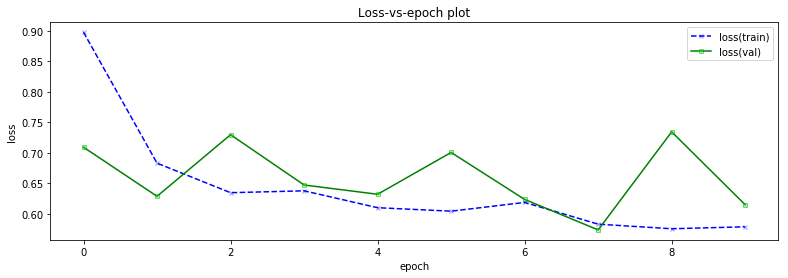

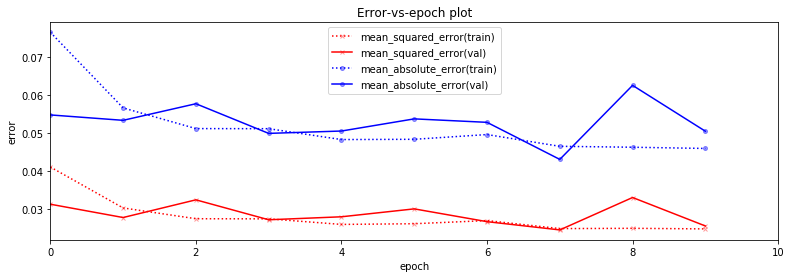

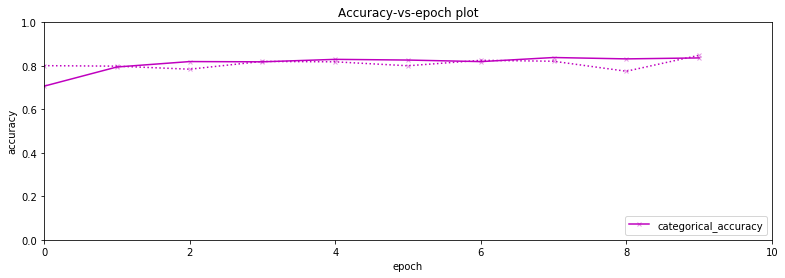

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

### Qb Repeat Grp10's Go at the Search Quest

Now, try to crank up the accuracy for the model using the MNIST data, you could follow the NN layout found by ITMAL Grp10 using an MLP in the Scikit-learn framework.

Basically, they created a seven-layer `sklearn.neural_network.MLPClassifier`, with layer sizes 20-50-70-100-70-50-20. Their Scikit-learn `MLPClassifier` constructor looked like  

```python
CTOR for best model: MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='sgd',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
```

See, if you can create a somewhat similar model in Keras, but feel free to replace any of the other hyperparameters (where some are not even present in Keras).

That best accuracy can you get from your model---for your validation or test set? 

For the journal describe your investigation methods and results in your quest-quest for a higher accuracy score on MNIST. 

In [105]:
# TODO: Qb...
# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=20, activation="relu", kernel_initializer="normal"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=70, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=70, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

optimizer = SGD(lr=0.1, momentum=0.9, nesterov=True, )
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

Training time: 44.4 sec
Test loss:     2.3106658132643925
Test accuracy: 0.11257142857142857
All scores in history: [2.3106658132643925, 0.11257142857142857, 0.09016686532610939, 0.17991037552129654]


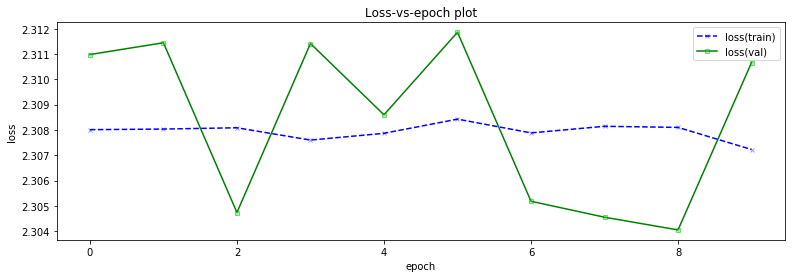

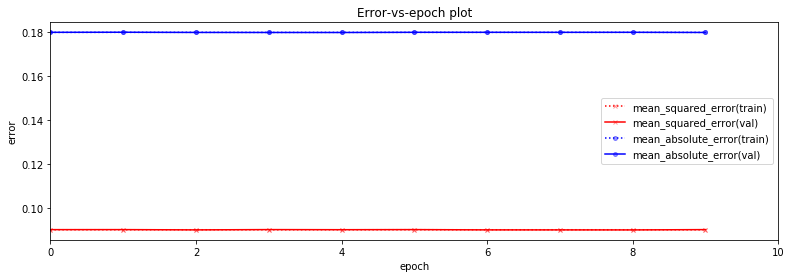

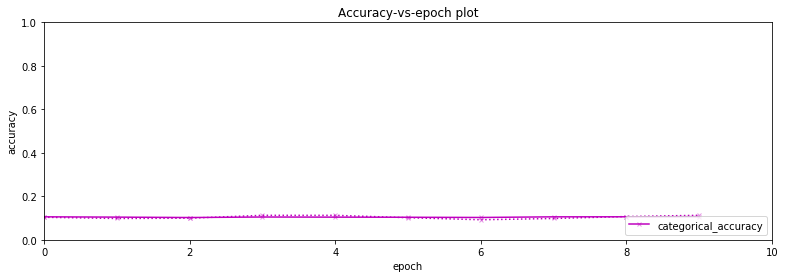

In [106]:
# Train
VERBOSE     = 0
EPOCHS      = 10

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

### [OPTIONAL] Qc Make a Keras Compatible F1-score

One drawback of Keres is the smaller set of score (metric) functions. Try to create your own F1-score that is compatible with the Keras categorical data.

Perhaps you can base your implementation on the Keras accuracy function

```python
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())
```

BUT BEWARE: you need to be able to interpret the TensorFlow tensor data!

In [ ]:
# TODO: [OPTIONAL] Qc..